In [1]:
import pandas as pd

In [21]:
import os
import pandas as pd

# Define the directory containing the CSV files
# Update the path to point to the directory on your desktop
directory = os.path.expanduser('~/Desktop/MLQS')

# Create a list to hold dataframes
dataframes = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(f"Processing file: {filename}")
        # Read each CSV file
        df = pd.read_csv(os.path.join(directory, filename))
        # Append the dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged dataframe to a new CSV file
output_path = os.path.join(directory, 'merged_accelerometer_data.csv')
merged_df.to_csv(output_path, index=False)

print(f"All CSV files have been merged successfully into {output_path}.")


Processing file: Accelerometer9.csv
Processing file: merged_accelerometer_data.csv
Processing file: Accelerometer8.csv
Processing file: Accelerometer1.csv
Processing file: Accelerometer3.csv
Processing file: Accelerometer2.csv
Processing file: Accelerometer10.csv
Processing file: Accelerometer6.csv
Processing file: Accelerometer7.csv
Processing file: Accelerometer5.csv
Processing file: Accelerometer4.csv
All CSV files have been merged successfully into /Users/izlemkurt/Desktop/MLQS/merged_accelerometer_data.csv.


In [2]:
import pandas as pd

data = pd.read_csv('/Users/izlemkurt/Desktop/MLQS/merged_accelerometer_data.csv')
data.head()


,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.002518,-2.552642,5.921087,4.652475
1,0.022672,-2.800676,6.115533,6.387966
2,0.042826,-1.770967,6.122718,8.937315
3,0.062979,-0.907263,6.117928,9.902657
4,0.083133,-1.207240,6.154302,8.752749


In [3]:
data.describe()

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
count,236236.000000,236236.000000,236236.000000,236236.000000
mean,119.236889,-0.048727,3.996045,8.921998
std,69.067228,1.247180,1.529307,2.190921
min,-0.000943,-10.143057,-3.528612,-3.849695
25%,59.511991,-0.522114,3.209027,8.064180
50%,119.024072,-0.204175,4.096756,8.706495
75%,178.536597,0.330363,5.106780,9.213790
max,242.545474,9.990525,13.974939,27.477011


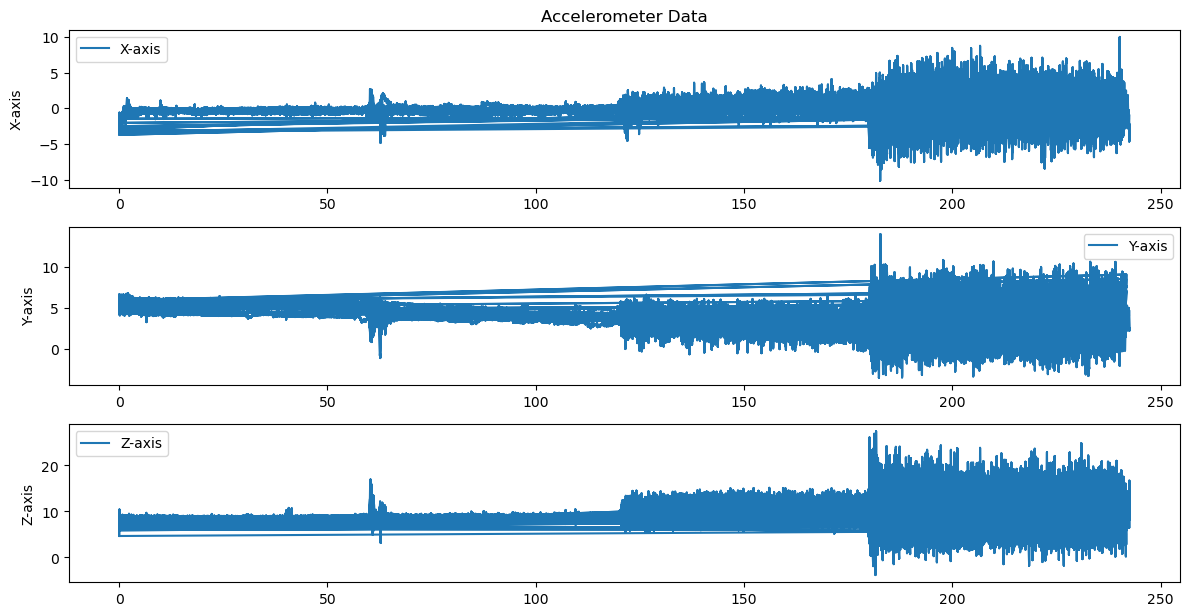

In [4]:
import matplotlib.pyplot as plt

# Plot the accelerometer data
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Time (s)'], data['X (m/s^2)'], label='X-axis')
plt.title('Accelerometer Data')
plt.ylabel('X-axis')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(data['Time (s)'], data['Y (m/s^2)'], label='Y-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(data['Time (s)'], data['Z (m/s^2)'], label='Z-axis')
plt.ylabel('Z-axis')
plt.legend()



plt.tight_layout()
plt.show()


In [5]:
data.isnull().sum()

Time (s)     0
X (m/s^2)    0
Y (m/s^2)    0
Z (m/s^2)    0
dtype: int64

Labelling Data

In [6]:
activity_duration = 60  # 1 minutes

# Create the time intervals
activities = ['sitting', 'standing', 'walking', 'running']
intervals = [(i * activity_duration, (i + 1) * activity_duration) for i in range(len(activities))]

data['Activity'] = 'unknown'

# Label the data based on the intervals
for activity, (start, end) in zip(activities, intervals):
    data.loc[(data['Time (s)'] >= start) & (data['Time (s)'] < end), 'Activity'] = activity

print(data.head(10))
print(data['Activity'].value_counts())

   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2) Activity
0  0.002518  -2.552642   5.921087   4.652475  sitting
1  0.022672  -2.800676   6.115533   6.387966  sitting
2  0.042826  -1.770967   6.122718   8.937315  sitting
3  0.062979  -0.907263   6.117928   9.902657  sitting
4  0.083133  -1.207240   6.154302   8.752749  sitting
5  0.103286  -1.798510   6.303093   7.228319  sitting
6  0.123440  -1.918560   6.243367   6.794970  sitting
7  0.143594  -1.768273   6.192473   6.858587  sitting
8  0.163747  -1.494642   6.290818   7.206314  sitting
9  0.183901  -1.180296   6.338719   7.581285  sitting
Activity
sitting     59550
walking     59542
standing    59540
running     56322
unknown      1282
Name: count, dtype: int64


In [7]:
summary_stats = data.describe().transpose()
summary_stats['missing (%)'] = data.isnull().mean() * 100

# Calculate percentage of each activity
activity_percentage = data['Activity'].value_counts(normalize=True) * 100

print(summary_stats)
print(activity_percentage)


              count        mean        std        min        25%         50%  \
Time (s)   236236.0  119.236889  69.067228  -0.000943  59.511991  119.024072   
X (m/s^2)  236236.0   -0.048727   1.247180 -10.143057  -0.522114   -0.204175   
Y (m/s^2)  236236.0    3.996045   1.529307  -3.528612   3.209027    4.096756   
Z (m/s^2)  236236.0    8.921998   2.190921  -3.849695   8.064180    8.706495   

                  75%         max  missing (%)  
Time (s)   178.536597  242.545474          0.0  
X (m/s^2)    0.330363    9.990525          0.0  
Y (m/s^2)    5.106780   13.974939          0.0  
Z (m/s^2)    9.213790   27.477011          0.0  
Activity
sitting     25.207843
walking     25.204457
standing    25.203610
running     23.841413
unknown      0.542678
Name: proportion, dtype: float64


In [8]:
summary_table = summary_stats[['mean', 'std', 'min', 'max', 'missing (%)']]
print(summary_table)

# Create a table for the percentage of each activity
activity_table = pd.DataFrame(activity_percentage).reset_index()
activity_table.columns = ['Activity', 'Percentage of cases (%)']
print(activity_table)


                 mean        std        min         max  missing (%)
Time (s)   119.236889  69.067228  -0.000943  242.545474          0.0
X (m/s^2)   -0.048727   1.247180 -10.143057    9.990525          0.0
Y (m/s^2)    3.996045   1.529307  -3.528612   13.974939          0.0
Z (m/s^2)    8.921998   2.190921  -3.849695   27.477011          0.0
   Activity  Percentage of cases (%)
0   sitting                25.207843
1   walking                25.204457
2  standing                25.203610
3   running                23.841413
4   unknown                 0.542678


In [9]:
data.head()

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2),Activity
0,0.002518,-2.552642,5.921087,4.652475,sitting
1,0.022672,-2.800676,6.115533,6.387966,sitting
2,0.042826,-1.770967,6.122718,8.937315,sitting
3,0.062979,-0.907263,6.117928,9.902657,sitting
4,0.083133,-1.207240,6.154302,8.752749,sitting


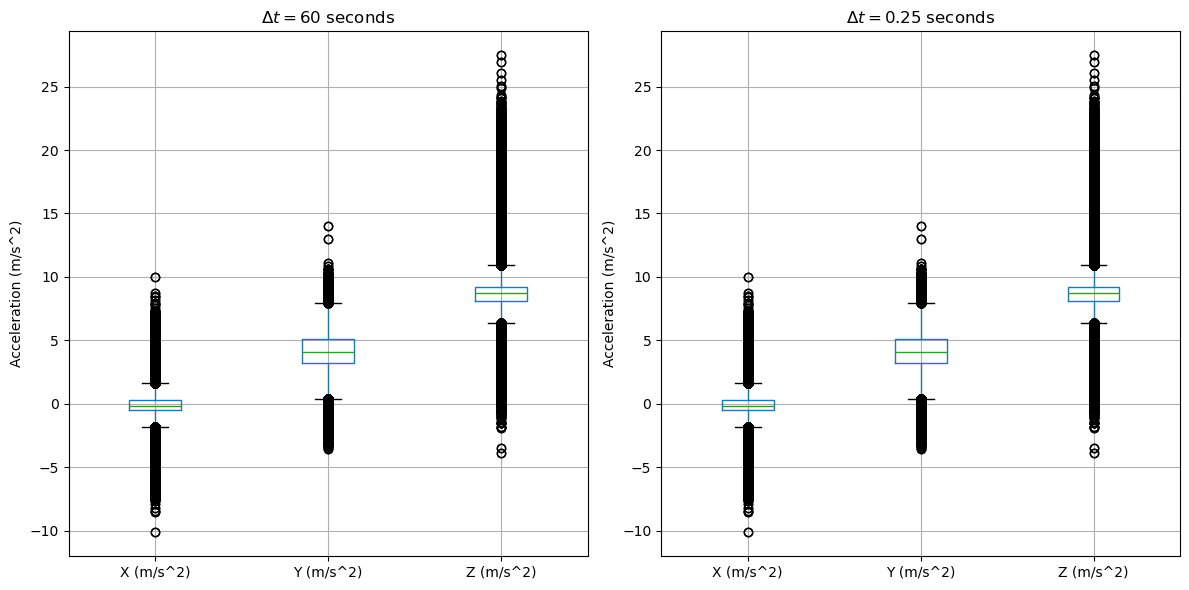

In [10]:
# Boxplot for each accelerometer axis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']].boxplot()
plt.title(r'$\Delta t = 60$ seconds')
plt.ylabel('Acceleration (m/s^2)')


plt.subplot(1, 2, 2)
data[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']].boxplot()
plt.title(r'$\Delta t = 0.25$ seconds')
plt.ylabel('Acceleration (m/s^2)')

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Load your dataset (assuming it's a CSV file)
#data = pd.read_csv('/path/to/your/Raw Data.csv')

# Check for missing values in the Activity column
missing_activities = data['Activity'].isnull().sum()
print(f"Missing Activity labels: {missing_activities}")

# Check the unique values in the Activity column
unique_activities = data['Activity'].unique()
print(f"Unique activities: {unique_activities}")

# Check the distribution of activities
activity_distribution = data['Activity'].value_counts(normalize=True) * 100
print("Activity distribution (%):")
print(activity_distribution)


Missing Activity labels: 0
Unique activities: ['sitting' 'standing' 'walking' 'running' 'unknown']
Activity distribution (%):
Activity
sitting     25.207843
walking     25.204457
standing    25.203610
running     23.841413
unknown      0.542678
Name: proportion, dtype: float64


In [12]:
pip install pykalman

Note: you may need to restart the kernel to use updated packages.


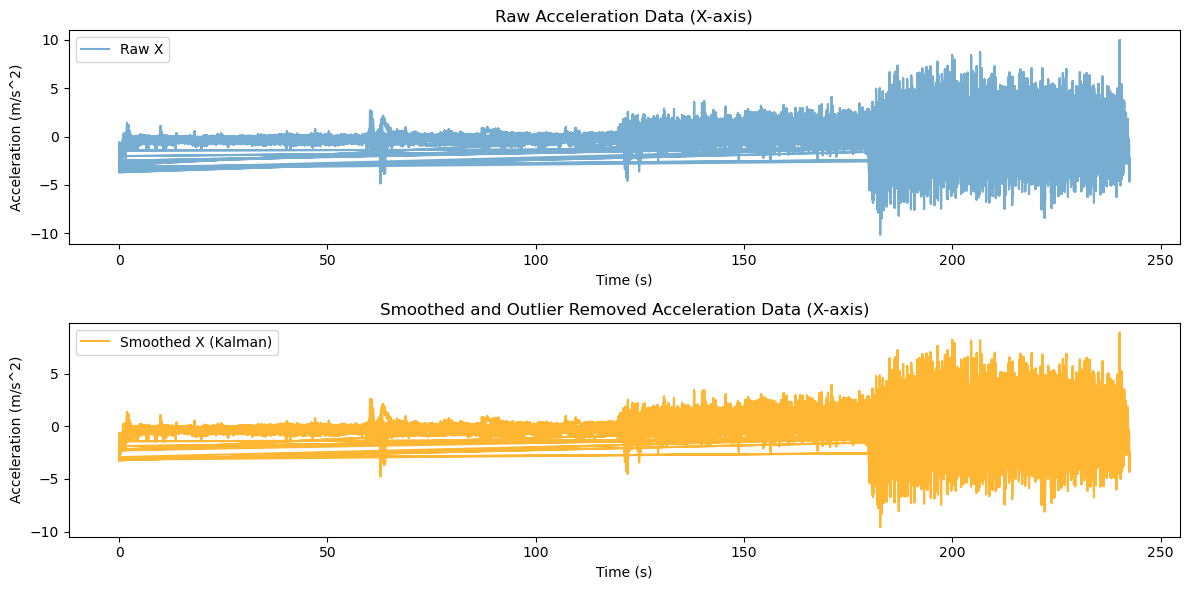

In [14]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from scipy.special import erf

# Load data


# Apply Kalman filter to smooth the data
def apply_kalman_filter(data):
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    state_means, _ = kf.em(data, n_iter=10).filter(data)
    return state_means

data['X_kalman'] = apply_kalman_filter(data['X (m/s^2)'])
data['Y_kalman'] = apply_kalman_filter(data['Y (m/s^2)'])
data['Z_kalman'] = apply_kalman_filter(data['Z (m/s^2)'])

# Function to apply Chauvenet's criterion to remove outliers
def chauvenet(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    N = len(data)
    criterion = 1.0 / (2 * N)
    d = np.abs(data - mean) / std_dev
    prob = 1 - 2 * (1 - 0.5 * (1 + erf(d / np.sqrt(2))))
    filtered_data = data[prob >= criterion]
    return filtered_data

# Apply Chauvenet's criterion to each filtered axis
data['X_kalman'] = chauvenet(data['X_kalman'])
data['Y_kalman'] = chauvenet(data['Y_kalman'])
data['Z_kalman'] = chauvenet(data['Z_kalman'])

# Fill any remaining NaN values resulting from outlier removal
data['X_kalman'].fillna(data['X_kalman'].mean(), inplace=True)
data['Y_kalman'].fillna(data['Y_kalman'].mean(), inplace=True)
data['Z_kalman'].fillna(data['Z_kalman'].mean(), inplace=True)

# Save the preprocessed dataset
data.to_csv('preprocessed_data_kalman_outliers.csv', index=False)

# Plot the raw vs smoothed data for X-axis with improved visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot raw data
plt.subplot(2, 1, 1)
plt.plot(data['Time (s)'], data['X (m/s^2)'], label='Raw X', alpha=0.6)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Raw Acceleration Data (X-axis)')
plt.legend()

# Plot smoothed data
plt.subplot(2, 1, 2)
plt.plot(data['Time (s)'], data['X_kalman'], label='Smoothed X (Kalman)', color='orange', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Smoothed and Outlier Removed Acceleration Data (X-axis)')
plt.legend()

plt.tight_layout()
plt.show()


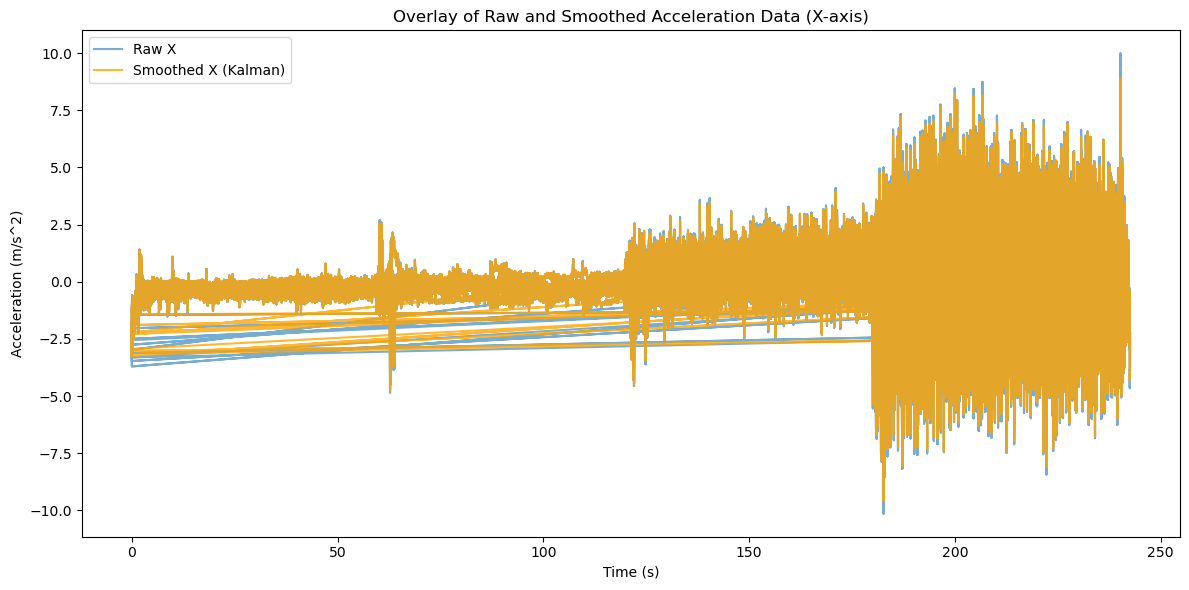

In [15]:
plt.figure(figsize=(12, 6))

# Overlay raw and smoothed data
plt.plot(data['Time (s)'], data['X (m/s^2)'], label='Raw X', alpha=0.6)
plt.plot(data['Time (s)'], data['X_kalman'], label='Smoothed X (Kalman)', color='orange', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Overlay of Raw and Smoothed Acceleration Data (X-axis)')
plt.legend()

plt.tight_layout()
plt.show()
